# Import libs

In [1]:
import pandas as pd
import numpy as np
from models.knn.knn import knn
from models.dmc.dmc import dmc
from models.kmeans.kmeans import kmeans
from models.naive_bayes_classifier.naive_bayes_classifier import naive_bayes_classifier
from models.bayes_classifier.bayes_classifier import bayes_classifier
from models.bayes_linear_classifier.bayes_linear_classifier import bayes_linear_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean, min_max_normalization
from matplotlib import pyplot as plt

# Loading normalized Column dataset

In [2]:
Xy = pd.read_csv('./datasets/vertebral_column_3C.dat', header=None, sep=' ', engine='python')

X = min_max_normalization(Xy.drop(Xy.columns[-1:], axis=1))
y = Xy[Xy.columns[-1]]

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
kmeans_hit_rate_list = []
nb_hit_rate_list = []
b_hit_rate_list = []
b_majority_class_hit_rate_list = []
b_mean_class_hit_rate_list = []
lb_hit_rate_list = []

knn_std_dev = 0
dmc_std_dev = 0
kmeans_std_dev = 0
nb_std_dev = 0
b_std_dev = 0
b_majority_class_std_dev = 0
b_mean_class_std_dev = 0
lb_std_dev = 0

knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
kmeans_confusion_matrix_list = []
nb_confusion_matrix_list = []
b_confusion_matrix_list = []
b_majority_class_confusion_matrix_list = []
b_mean_class_confusion_matrix_list = []
lb_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
    kmeans_model.fit(X_train, y_train)

    nb_model = naive_bayes_classifier()
    nb_model.fit(X_train, y_train)

    b_model = bayes_classifier()
    b_model.fit(X_train, y_train)

    b_majority_class_model = bayes_classifier(covariance_matrix_type='majority_class')
    b_majority_class_model.fit(X_train, y_train)

    b_mean_class_model = bayes_classifier(covariance_matrix_type='mean_class')
    b_mean_class_model.fit(X_train, y_train)

    lb_model = bayes_linear_classifier()
    lb_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    kmeans_hit_rate_list.append(kmeans_model.score(X_test, y_test))
    nb_hit_rate_list.append(nb_model.score(X_test, y_test))
    b_hit_rate_list.append(b_model.score(X_test, y_test))
    b_majority_class_hit_rate_list.append(b_majority_class_model.score(X_test, y_test))
    b_mean_class_hit_rate_list.append(b_mean_class_model.score(X_test, y_test))
    lb_hit_rate_list.append(lb_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    kmeans_y_pred = [kmeans_model.predict(x) for x in X_test.values]
    nb_y_pred = [nb_model.predict(x) for x in X_test.values]
    b_y_pred = [b_model.predict(x) for x in X_test.values]
    b_majority_class_y_pred = [b_majority_class_model.predict(x) for x in X_test.values]
    b_mean_class_y_pred = [b_mean_class_model.predict(x) for x in X_test.values]
    lb_y_pred = [lb_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    kmeans_confusion_matrix_list.append(confusion_matrix(y_test, kmeans_y_pred))
    nb_confusion_matrix_list.append(confusion_matrix(y_test, nb_y_pred))
    b_confusion_matrix_list.append(confusion_matrix(y_test, b_y_pred))
    b_majority_class_confusion_matrix_list.append(confusion_matrix(y_test, b_majority_class_y_pred))
    b_mean_class_confusion_matrix_list.append(confusion_matrix(y_test, b_mean_class_y_pred))
    lb_confusion_matrix_list.append(confusion_matrix(y_test, lb_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
kmeans_std_dev = np.std(kmeans_hit_rate_list)
nb_std_dev = np.std(nb_hit_rate_list)
b_std_dev = np.std(b_hit_rate_list)
b_majority_class_std_dev = np.std(b_majority_class_hit_rate_list)
b_mean_class_std_dev = np.std(b_mean_class_hit_rate_list)
lb_std_dev = np.std(lb_hit_rate_list)

w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'floa

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.8548387096774194, 0.8064516129032258, 0.6935483870967742, 0.6451612903225806, 0.7258064516129032, 0.7580645161290323, 0.6451612903225806, 0.6451612903225806, 0.7741935483870968, 0.7096774193548387, 0.7741935483870968, 0.6935483870967742, 0.7258064516129032, 0.7096774193548387, 0.7419354838709677, 0.8064516129032258, 0.8064516129032258, 0.7741935483870968, 0.8225806451612904, 0.7258064516129032]

Accuracy:
0.7419354838709677

Standard Deviation:
0.05948093198253475

Confusion Matrix:
    SL  DH  NO
SL  29   0   2
DH   2   9   1
NO   2   2  15
    NO  DH  SL
NO  11   3   3
DH   2   8   0
SL   1   3  31
    DH  SL  NO
DH   4   1   7
SL   2  31   3
NO   3   3   8
    NO  SL  DH
NO  14   5   3
SL   2  19   4
DH   7   1   7
    SL  NO  DH
SL  22   3   2
NO   3  14   7
DH   1   1   9
    SL  NO  DH
SL  28   1   1
NO   2  14   6
DH   3   2   5
    DH  SL  NO
DH  11   2  11
SL   1  17   5
NO   1   2  12
    SL  NO  DH
SL  26   8   2
NO 

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,SL,DH,NO
SL,26,1,3
DH,1,6,4
NO,3,3,12


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.7903225806451613, 0.7419354838709677, 0.7580645161290323, 0.7258064516129032, 0.7419354838709677, 0.7419354838709677, 0.7096774193548387, 0.7096774193548387, 0.7580645161290323, 0.6129032258064516, 0.7580645161290323, 0.7258064516129032, 0.7419354838709677, 0.7419354838709677, 0.7258064516129032, 0.7741935483870968, 0.7903225806451613, 0.7580645161290323, 0.7741935483870968, 0.7258064516129032]

Accuracy:
0.7403225806451614

Standard Deviation:
0.03709677419354837

Confusion Matrix:
    SL  DH  NO
SL  26   2   3
DH   2  10   0
NO   2   4  13
    NO  DH  SL
NO   9   5   3
DH   2   7   1
SL   3   2  30
    DH  SL  NO
DH   9   1   2
SL   2  30   4
NO   4   2   8
    NO  SL  DH
NO  13   5   4
SL   5  19   1
DH   1   1  13
    SL  NO  DH
SL  22   4   1
NO   3  15   6
DH   0   2   9
    SL  NO  DH
SL  25   4   1
NO   3  14   5
DH   2   1   7
    DH  SL  NO
DH  17   6   1
SL   2  17   4
NO   4   1  10
    SL  NO  DH
SL  25   8   3
NO 

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,SL,DH,NO
SL,24,1,4
DH,1,9,1
NO,2,3,12


# Showing kmeans informations computed

In [8]:
print('----------------- KMEANS model -----------------')
print('Hit rate:')
print(kmeans_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(kmeans_hit_rate_list)/len(kmeans_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(kmeans_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in kmeans_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KMEANS model -----------------
Hit rate:
[0.7903225806451613, 0.7580645161290323, 0.7580645161290323, 0.7096774193548387, 0.5967741935483871, 0.6612903225806451, 0.5483870967741935, 0.7258064516129032, 0.7096774193548387, 0.6935483870967742, 0.7741935483870968, 0.7580645161290323, 0.7096774193548387, 0.7741935483870968, 0.7096774193548387, 0.7258064516129032, 0.8387096774193549, 0.7580645161290323, 0.8709677419354839, 0.7741935483870968]

Accuracy:
0.732258064516129

Standard Deviation:
0.0716608383597518

Confusion Matrix:
    SL  DH  NO
SL  29   1   1
DH   3   6   3
NO   3   2  14
    NO  DH  SL
NO  14   1   2
DH   6   3   1
SL   4   1  30
    DH  SL  NO
DH   7   0   5
SL   2  31   3
NO   3   2   9
    NO  SL  DH
NO  14   6   2
SL   2  21   2
DH   5   1   9
    SL  NO  DH
SL  22   2   3
NO   4  11   9
DH   2   5   4
    SL  NO  DH
SL  22   6   2
NO   3  14   5
DH   2   3   5
    DH  SL  NO
DH  10   6   8
SL   0  16   7
NO   3   4   8
    SL  NO  DH
SL  30   6   0
NO

In [9]:
confusion_matrix_mean(kmeans_confusion_matrix_list)

,SL,DH,NO
SL,26,1,3
DH,1,6,4
NO,3,3,12


# Showing naive bayes informations computed

In [10]:
print('----------------- NAIVE BAYES model -----------------')
print('Hit rate:')
print(nb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(nb_hit_rate_list)/len(nb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(nb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in nb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- NAIVE BAYES model -----------------
Hit rate:
[0.8548387096774194, 0.8548387096774194, 0.8387096774193549, 0.8225806451612904, 0.8387096774193549, 0.8387096774193549, 0.7258064516129032, 0.8387096774193549, 0.8387096774193549, 0.7580645161290323, 0.7903225806451613, 0.8548387096774194, 0.8064516129032258, 0.8387096774193549, 0.8225806451612904, 0.7903225806451613, 0.8870967741935484, 0.8870967741935484, 0.8225806451612904, 0.8225806451612904]

Accuracy:
0.8266129032258066

Standard Deviation:
0.03778292508104025

Confusion Matrix:
    SL  DH  NO
SL  30   0   1
DH   0   9   3
NO   0   5  14
    NO  DH  SL
NO  11   4   2
DH   2   7   1
SL   0   0  35
    DH  SL  NO
DH   8   1   3
SL   0  35   1
NO   3   2   9
    NO  SL  DH
NO  16   4   2
SL   1  24   0
DH   3   1  11
    SL  NO  DH
SL  26   1   0
NO   2  16   6
DH   0   1  10
    SL  NO  DH
SL  30   0   0
NO   1  15   6
DH   0   3   7
    DH  SL  NO
DH  12   2  10
SL   0  22   1
NO   3   1  11
    SL  NO  DH
SL  36   0

In [11]:
confusion_matrix_mean(nb_confusion_matrix_list)

,SL,DH,NO
SL,30,0,0
DH,0,8,3
NO,1,4,12


# Showing bayes informations computed

In [12]:
print('----------------- BAYES model -----------------')
print('Hit rate:')
print(b_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_hit_rate_list)/len(b_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES model -----------------
Hit rate:
[0.8709677419354839, 0.8709677419354839, 0.8709677419354839, 0.8548387096774194, 0.7903225806451613, 0.8548387096774194, 0.7419354838709677, 0.7903225806451613, 0.8709677419354839, 0.7741935483870968, 0.8064516129032258, 0.7903225806451613, 0.8064516129032258, 0.8064516129032258, 0.8709677419354839, 0.8064516129032258, 0.8870967741935484, 0.8709677419354839, 0.8064516129032258, 0.8548387096774194]

Accuracy:
0.8298387096774194

Standard Deviation:
0.04095472234062783

Confusion Matrix:
    SL  DH  NO
SL  30   0   1
DH   0   8   4
NO   0   3  16
    NO  DH  SL
NO  12   2   3
DH   3   7   0
SL   0   0  35
    DH  SL  NO
DH   6   0   6
SL   0  36   0
NO   1   1  12
    NO  SL  DH
NO  19   1   2
SL   0  24   1
DH   4   1  10
    SL  NO  DH
SL  27   0   0
NO   2  15   7
DH   1   3   7
    SL  NO  DH
SL  30   0   0
NO   1  16   5
DH   1   2   7
    DH  SL  NO
DH  11   1  12
SL   0  22   1
NO   2   0  13
    SL  NO  DH
SL  35   1   0
N

In [13]:
confusion_matrix_mean(b_confusion_matrix_list)

,SL,DH,NO
SL,30,0,0
DH,0,6,5
NO,1,3,14


# Showing Bayes Majority Class Informations computed

In [14]:
print('----------------- BAYES M C model -----------------')
print('Hit rate:')
print(b_majority_class_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_majority_class_hit_rate_list)/len(b_majority_class_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_majority_class_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_majority_class_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES M C model -----------------
Hit rate:
[0.8548387096774194, 0.8387096774193549, 0.8225806451612904, 0.7419354838709677, 0.7903225806451613, 0.8225806451612904, 0.7096774193548387, 0.7096774193548387, 0.7580645161290323, 0.6290322580645161, 0.8064516129032258, 0.7903225806451613, 0.7741935483870968, 0.7580645161290323, 0.7903225806451613, 0.8709677419354839, 0.8548387096774194, 0.8387096774193549, 0.8064516129032258, 0.8225806451612904]

Accuracy:
0.789516129032258

Standard Deviation:
0.0578119507032993

Confusion Matrix:
    SL  DH  NO
SL  29   0   2
DH   0   5   7
NO   0   0  19
    NO  DH  SL
NO  14   1   2
DH   4   5   1
SL   0   2  33
    DH  SL  NO
DH   7   1   4
SL   1  33   2
NO   1   2  11
    NO  SL  DH
NO  16   5   1
SL   2  22   1
DH   6   1   8
    SL  NO  DH
SL  24   1   2
NO   1  19   4
DH   0   5   6
    SL  NO  DH
SL  28   1   1
NO   3  16   3
DH   3   0   7
    DH  SL  NO
DH  11   6   7
SL   1  20   2
NO   1   1  13
    SL  NO  DH
SL  32   3   1

In [15]:
confusion_matrix_mean(b_majority_class_confusion_matrix_list)

,SL,DH,NO
SL,27,0,2
DH,1,5,5
NO,2,1,15


# Showing Bayes Mean Class informations computed

In [16]:
print('----------------- BAYES MEAN C model -----------------')
print('Hit rate:')
print(b_mean_class_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_mean_class_hit_rate_list)/len(b_mean_class_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_mean_class_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_mean_class_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES MEAN C model -----------------
Hit rate:
[0.9032258064516129, 0.8709677419354839, 0.8387096774193549, 0.8064516129032258, 0.7419354838709677, 0.8064516129032258, 0.7419354838709677, 0.8225806451612904, 0.8064516129032258, 0.7419354838709677, 0.8064516129032258, 0.8387096774193549, 0.8064516129032258, 0.7741935483870968, 0.7903225806451613, 0.8870967741935484, 0.8709677419354839, 0.8387096774193549, 0.8225806451612904, 0.8387096774193549]

Accuracy:
0.8177419354838709

Standard Deviation:
0.044785301215854265

Confusion Matrix:
    SL  DH  NO
SL  29   0   2
DH   0   9   3
NO   0   1  18
    NO  DH  SL
NO  14   1   2
DH   3   7   0
SL   1   1  33
    DH  SL  NO
DH   8   0   4
SL   1  33   2
NO   2   1  11
    NO  SL  DH
NO  19   2   1
SL   2  21   2
DH   5   0  10
    SL  NO  DH
SL  23   2   2
NO   1  17   6
DH   0   5   6
    SL  NO  DH
SL  27   2   1
NO   1  16   5
DH   0   3   7
    DH  SL  NO
DH  13   0  11
SL   1  20   2
NO   1   1  13
    SL  NO  DH
SL  33  

In [17]:
confusion_matrix_mean(b_mean_class_confusion_matrix_list)

,SL,DH,NO
SL,27,0,2
DH,0,7,4
NO,1,2,15


# Showing Linear Bayes informations computed

In [18]:
print('----------------- LINEAR BAYES model -----------------')
print('Hit rate:')
print(lb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(lb_hit_rate_list)/len(lb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(lb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in lb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- LINEAR BAYES model -----------------
Hit rate:
[0.8709677419354839, 0.8225806451612904, 0.8548387096774194, 0.7903225806451613, 0.8064516129032258, 0.8225806451612904, 0.7419354838709677, 0.7096774193548387, 0.7903225806451613, 0.6935483870967742, 0.7903225806451613, 0.8064516129032258, 0.7741935483870968, 0.7741935483870968, 0.8064516129032258, 0.8870967741935484, 0.8870967741935484, 0.9032258064516129, 0.8225806451612904, 0.8387096774193549]

Accuracy:
0.8096774193548386

Standard Deviation:
0.05460100283809921

Confusion Matrix:
    SL  DH  NO
SL  29   0   2
DH   0   7   5
NO   0   1  18
    NO  DH  SL
NO  14   1   2
DH   4   5   1
SL   1   2  32
    DH  SL  NO
DH   8   1   3
SL   1  34   1
NO   1   2  11
    NO  SL  DH
NO  17   4   1
SL   2  23   0
DH   5   1   9
    SL  NO  DH
SL  25   0   2
NO   1  19   4
DH   1   4   6
    SL  NO  DH
SL  28   1   1
NO   2  17   3
DH   3   1   6
    DH  SL  NO
DH  11   5   8
SL   0  22   1
NO   1   1  13
    SL  NO  DH
SL  32   

In [19]:
confusion_matrix_mean(lb_confusion_matrix_list)

,SL,DH,NO
SL,28,0,1
DH,1,6,4
NO,1,1,15


# Choosing two columns from the last X_train and X_test to plot decision surface

In [20]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
            0         1
287  0.066454  0.111290
64   0.482253  0.508932
28   0.177469  0.508753
296  0.130305  0.406574
241  0.244792  0.358521
..        ...       ...
121  0.556809  0.529296
142  0.570409  0.443551
216  0.238812  0.236334
116  0.427566  0.340121
9    0.101659  0.206502

[248 rows x 2 columns]
Test dataset:
            0         1
270  0.242670  0.275634
16   0.363426  0.480707
103  0.227913  0.232583
302  0.274402  0.500893
181  0.371046  0.389068
..        ...       ...
58   0.164448  0.468203
176  0.394290  0.354234
211  0.277488  0.455877
72   0.567323  0.706860
150  0.530093  0.486602

[62 rows x 2 columns]


# Training the models with the new dataset 2d

In [21]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
kmeans_model.fit(X_train_2d, y_train)
nb_model = naive_bayes_classifier()
nb_model.fit(X_train_2d, y_train)
b_model = bayes_classifier()
b_model.fit(X_train_2d, y_train)
b_majority_class_model = bayes_classifier(covariance_matrix_type='majority_class')
b_majority_class_model.fit(X_train_2d, y_train)
b_mean_class_model = bayes_classifier(covariance_matrix_type='mean_class')
b_mean_class_model.fit(X_train_2d, y_train)
lb_model = bayes_linear_classifier()
lb_model.fit(X_train_2d, y_train)

w:\Home\ML\models\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

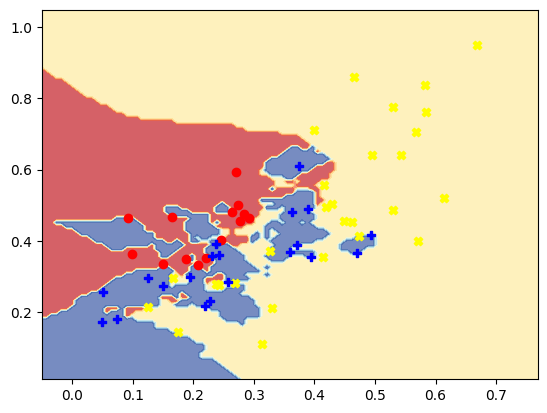

In [23]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

dh = np.where(knn_y_pred == 'DH')
sl = np.where(knn_y_pred == 'SL')
no = np.where(knn_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting dmc decision surface

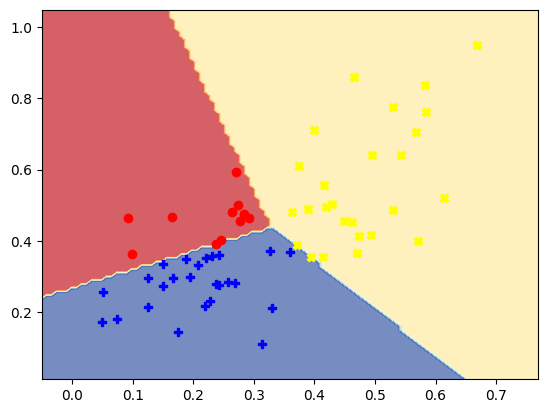

In [24]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

dh = np.where(dmc_y_pred == 'DH')
sl = np.where(dmc_y_pred == 'SL')
no = np.where(dmc_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting kmeans decision surface

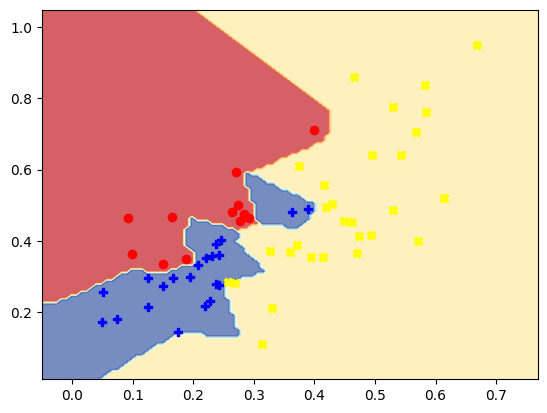

In [25]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[kmeans_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    elif y == 'NO':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

kmeans_y_pred = np.array([kmeans_model.predict(x) for x in X_test_2d.values])

dh = np.where(kmeans_y_pred == 'DH')
sl = np.where(kmeans_y_pred == 'SL')
no = np.where(kmeans_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting naive bayes decision surface

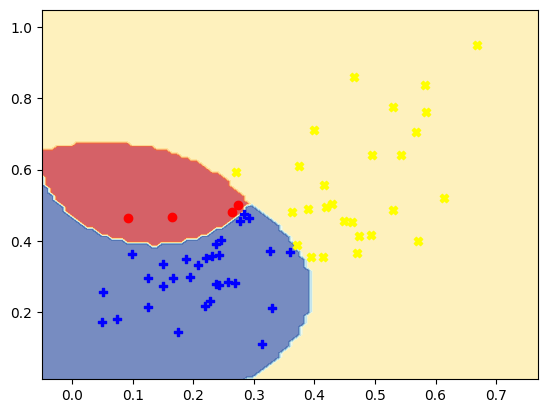

In [26]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[nb_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    elif y == 'NO':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

nb_y_pred = np.array([nb_model.predict(x) for x in X_test_2d.values])

dh = np.where(nb_y_pred == 'DH')
sl = np.where(nb_y_pred == 'SL')
no = np.where(nb_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting bayes decision surface

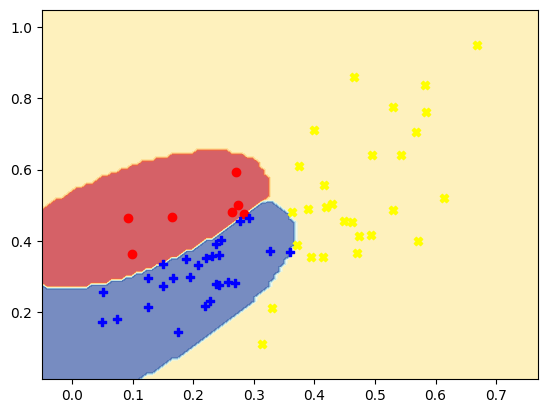

In [27]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    elif y == 'NO':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_y_pred = np.array([b_model.predict(x) for x in X_test_2d.values])

dh = np.where(b_y_pred == 'DH')
sl = np.where(b_y_pred == 'SL')
no = np.where(b_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting bayes majority class decision surface

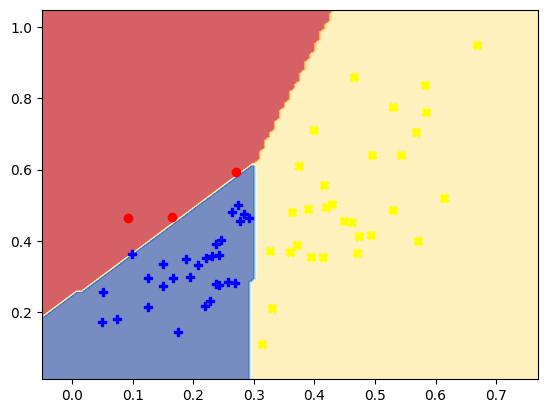

In [28]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_majority_class_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    elif y == 'NO':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_majority_class_y_pred = np.array([b_majority_class_model.predict(x) for x in X_test_2d.values])

dh = np.where(b_majority_class_y_pred == 'DH')
sl = np.where(b_majority_class_y_pred == 'SL')
no = np.where(b_majority_class_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting bayes mean class decision surface

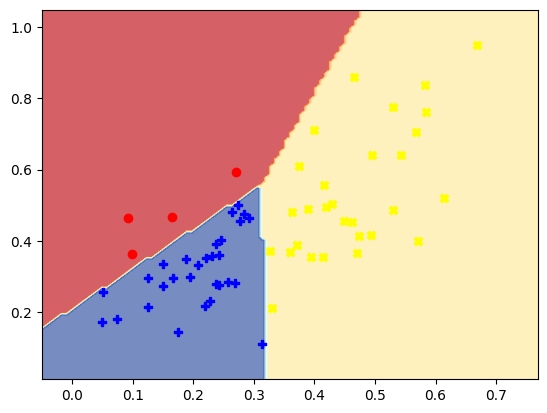

In [29]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_mean_class_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    elif y == 'NO':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_mean_class_y_pred = np.array([b_mean_class_model.predict(x) for x in X_test_2d.values])

dh = np.where(b_mean_class_y_pred == 'DH')
sl = np.where(b_mean_class_y_pred == 'SL')
no = np.where(b_mean_class_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting linear bayes decision surface

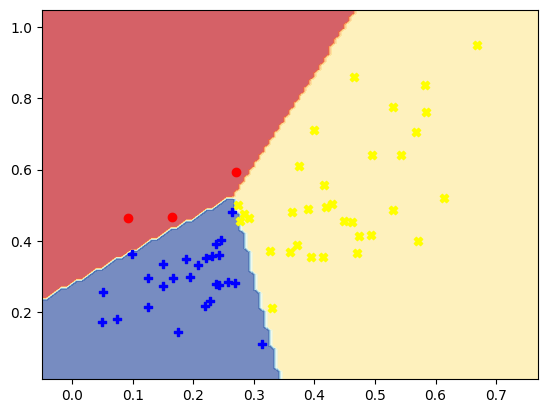

In [30]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[lb_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    elif y == 'NO':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

lb_y_pred = np.array([lb_model.predict(x) for x in X_test_2d.values])

dh = np.where(lb_y_pred == 'DH')
sl = np.where(lb_y_pred == 'SL')
no = np.where(lb_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()